In [7]:
import pickle
import imageio
import torch
import matplotlib.pyplot as plt
import numpy as np
from imgaug import augmenters as iaa
from skimage.transform import rotate, rescale
import seaborn as sns
%matplotlib inline

def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [8]:
ntasks = 10
filepath = './jd/'
alg = ['EWC', 'Online_EWC', 'SI', 'LwF']
single_task = {'EWC':0.625, 'Online_EWC':0.625, 'SI':0.625, 'LwF':0.625}

In [9]:
te = [[] for i in range(len(alg))]

for i, name in enumerate(alg):
    for task in range(ntasks):
        file_to_load = filepath+name+str(task+1)+'.pickle'
        res = unpickle(file_to_load)
        te[i].append(single_task[name]/res[0])

In [10]:
err_prog_nn = 0.269/np.asarray([0.269, 0.269, 0.269, 0.269, 0.269, 0.269, 0.269, 0.269, 0.269, 0.269])
err_df_cnn = 0.312/np.asarray([0.312, 0.366, 0.472, 0.594, 0.665, 0.694, 0.723, 0.768, 0.8, 0.81])

te.append(list(err_prog_nn))
te.append(list(err_df_cnn))
te.append([1.        , 0.97959834, 0.95013207, 0.930415  , 0.91383664,
        0.90319499, 0.89421549, 0.88775112, 0.88725663, 0.87607937])

In [14]:
te_ = [te[6], te[5], te[1], te[0], te[2], te[3], te[4]]
names = ['Lifelong Forest', 'DF-CNN', 'Online EWC', 'EWC', 'SI', 'LwF', 'Prog-NN']

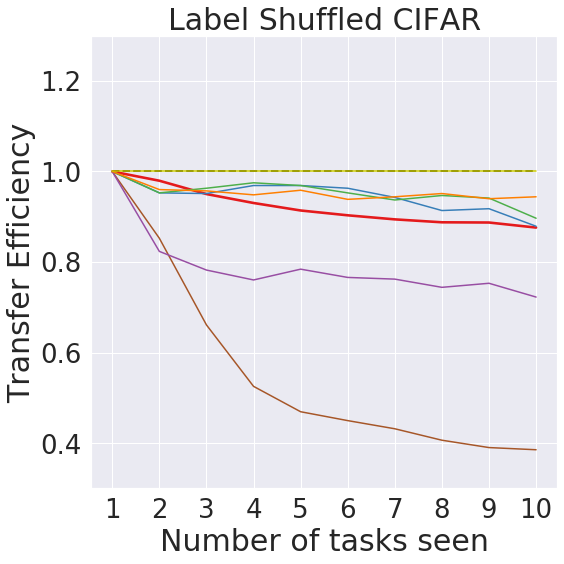

In [15]:
sns.set()
names = ['Lifelong Forest', 'DF-CNN','Online EWC', 'EWC', 'SI', 'LwF', 'Prog-NN']
fig, ax = plt.subplots(1,1, figsize=(8,8))
clr = ["#e41a1c", "#a65628", "#377eb8", "#4daf4a", "#984ea3", "#ff7f00", "#CCCC00"]
c = sns.color_palette(clr, n_colors=len(names))

for i in range(len(names)):
    if i==0:
        ax.plot(np.arange(1,11,1), te_[i], label = names[i], c=c[i], linewidth=2.6)
    else:
        ax.plot(np.arange(1,11,1), te_[i], label = names[i], c=c[i])


ax.set_title('Label Shuffled CIFAR', fontsize=30)
ax.set_xlabel('Number of tasks seen', fontsize=30)
ax.set_ylabel('Transfer Efficiency', fontsize=30)
ax.set_yticks([.4,.6,.8,1, 1.2])
ax.grid(axis='x')

ax.tick_params(labelsize=26)
ax.set_xticks([1,2,3,4,5,6,7,8,9,10])
ax.set_ylim(0.3, 1.3)
ax.grid(axis='x')
ax.hlines(1, 1,10, colors='k', linestyles='dashed',linewidth=2)
#ax.grid(axis='x')
plt.tight_layout()
    
plt.savefig('cifar-label-shuffle.pdf',dpi=500)

In [16]:
alg = ['LF', 'Online_EWC', 'EWC', 'SI', 'LwF']

angles = np.arange(0,180,1)
cvs = np.arange(1,7)
task_label = range(0,10)

l1 = len(alg)
l2 = len(angles)
mean_eta = np.zeros((l1,l2),dtype=float)

for no,name in enumerate(alg):
    print(no,name)
    for count,angle in enumerate(angles):
        filename = '/data/Jayanta/continual-learning/rotation_res/'+name+'_'+str(angle)+'.pickle'
        err = unpickle(filename)
    
        mean_eta[no,count] = err[0]/err[1]

0 LF
1 Online_EWC
2 EWC
3 SI
4 LwF


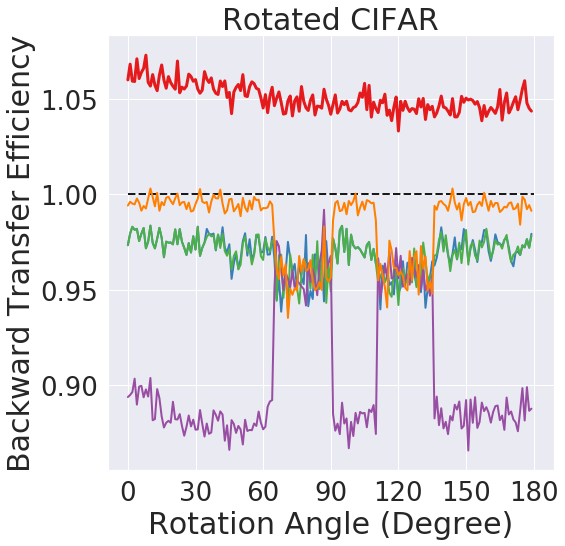

In [17]:
alg = ['LF', 'Online EWC', 'EWC', 'SI', 'LwF']
clr = ["#e41a1c", "#377eb8", "#4daf4a", "#984ea3", "#ff7f00"]
c = sns.color_palette(clr, n_colors=len(clr))
sns.set()

fontsize=30
ticksize=26

fig, ax = plt.subplots(1,1, figsize=(8,8))

for i in range(l1):
    if i==0:
        ax.plot(angles,mean_eta[i,:],c=clr[i], label = alg[i], linewidth=3)
    else:
        ax.plot(angles,mean_eta[i,:],c=clr[i], label = alg[i], linewidth=2)
    
ax.tick_params(labelsize=ticksize)
ax.set_xlabel('Rotation Angle (Degree)', fontsize=fontsize)
ax.set_ylabel('Backward Transfer Efficiency', fontsize=fontsize)
ax.set_xticks([0,30,60,90,120,150,180])
#ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize=fontsize)
ax.set_title('Rotated CIFAR',fontsize=fontsize)
ax.hlines(1, 0,180, colors='k', linestyles='dashed',linewidth=2)

plt.savefig('cifar-100-rotate.pdf', bbox_inches = 'tight', dpi=500)